## 1. Data Ingestion

In [61]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer #Prepare for dealing with NaN values
from sklearn.preprocessing import MinMaxScaler #Prepare for normalisation
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('forest_cover.csv')

In [62]:
df.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Forest_Cover,Neota,Rawah,Comanche Peak,Cache la Poudre
0,0,3351.0,NaN,27.0,726.0,124.0,3813.0,192.0,252.0,NaN,...,NaN,NaN,NaN,NaN,0.0,Spruce/Fir,0,1,0,0
1,1,2732.0,129.0,7.0,212.0,1.0,1082.0,231.0,236.0,137.0,...,NaN,NaN,NaN,0.0,0.0,Lodgepole Pine,0,0,1,0
2,2,2572.0,24.0,9.0,201.0,689.0,957.0,216.0,222.0,NaN,...,0.0,NaN,0.0,0.0,0.0,Lodgepole Pine,0,0,1,0
3,3,2824.0,69.0,13.0,417.0,39.0,3223.0,NaN,214.0,NaN,...,0.0,0.0,NaN,0.0,0.0,Lodgepole Pine,0,1,0,0
4,4,2529.0,84.0,5.0,120.0,9.0,1092.0,NaN,231.0,139.0,...,0.0,0.0,NaN,0.0,0.0,Lodgepole Pine,0,1,0,0


In [63]:
#Understand the shape of the dataset
print("Shape of the data:", df.shape)

#Understand each column's number of non-null values and data type
print(df.info())

Shape of the data: (30860, 56)
***************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          30860 non-null  int64  
 1   Elevation                           25923 non-null  float64
 2   Aspect                              23763 non-null  float64
 3   Slope                               28083 non-null  float64
 4   Horizontal_Distance_To_Hydrology    28392 non-null  float64
 5   Vertical_Distance_To_Hydrology      29009 non-null  float64
 6   Horizontal_Distance_To_Roadways     28392 non-null  float64
 7   Hillshade_9am                       21602 non-null  float64
 8   Hillshade_Noon                      27157 non-null  float64
 9   Hillshade_3pm                       22220 non-null  float64
 10 

## 2. Data Quality Assurance and Data Cleaning

In [65]:
#Define column header name
Elevation = "Elevation"
Aspect = "Aspect"
Slope = "Slope"
HD_toH = "Horizontal_Distance_To_Hydrology"
VD_toH = "Vertical_Distance_To_Hydrology"
HD_toR = "Horizontal_Distance_To_Roadways"
HS_9am = "Hillshade_9am"
HS_Noon = "Hillshade_Noon"
HS_3pm = "Hillshade_3pm"
HD_toFP = "Horizontal_Distance_To_Fire_Points"
Soil_Type_cols = [i for i in df.columns if "Soil_Type" in i]
Forest_Cover = "Forest_Cover"
Wilderness_cols = ["Neota", "Rawah", "Comanche Peak", "Cache la Poudre"]

Data quality problems identification

In [67]:
#Identify duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


In [68]:
#Identify missing values of each column
print("Table of Missing values number in each column")
print(df.isnull().sum())

print("Table of Missing values percentage in each column")
print(df.isnull().mean() * 100)

Table of Missing values number in each column
Unnamed: 0                                0
Elevation                              4937
Aspect                                 7097
Slope                                  2777
Horizontal_Distance_To_Hydrology       2468
Vertical_Distance_To_Hydrology         1851
Horizontal_Distance_To_Roadways        2468
Hillshade_9am                          9258
Hillshade_Noon                         3703
Hillshade_3pm                          8640
Horizontal_Distance_To_Fire_Points     5863
Soil_Type1                             5863
Soil_Type2                             2777
Soil_Type3                             5554
Soil_Type4                             6789
Soil_Type5                             3086
Soil_Type6                             8640
Soil_Type7                                0
Soil_Type8                                0
Soil_Type9                                0
Soil_Type10                               0
Soil_Type11                   

In [69]:
#Check the consistency in the Forest_Cover column
print(df[Forest_Cover].value_counts())

Forest_Cover
Lodgepole Pine       14945
Spruce/Fir           11391
Ponderosa Pine        1895
Krummholz             1060
Douglas-fir            939
Aspen                  489
Cottonwood/Willow      141
Name: count, dtype: int64
***************************************************************************


In [70]:
#Identify some extreme unreasonable values through statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30860.0,15429.500000,8908.658990,0.0,7714.75,15429.5,23144.25,30859.0
Elevation,25923.0,2954.202639,866.082144,-730.0,2796.00,2996.0,3173.00,6704.0
Aspect,23763.0,153.369019,490.489831,-1961.0,56.00,126.0,268.50,2281.0
Slope,28083.0,14.141402,22.473536,-81.0,8.00,13.0,19.00,108.0
Horizontal_Distance_To_Hydrology,28392.0,264.551176,679.431566,-2652.0,95.00,218.0,391.00,3144.0
Vertical_Distance_To_Hydrology,29009.0,46.756145,156.142288,-613.0,6.00,30.0,72.00,689.0
Horizontal_Distance_To_Roadways,28392.0,2363.317519,5379.999154,-20985.0,1057.00,1992.0,3393.25,25383.0
Hillshade_9am,21602.0,212.625127,81.804297,-132.0,197.00,218.0,232.00,561.0
Hillshade_Noon,27157.0,223.363700,59.364348,-27.0,212.00,226.0,238.00,477.0
Hillshade_3pm,22220.0,143.421782,124.874519,-381.0,117.00,143.0,171.00,669.0


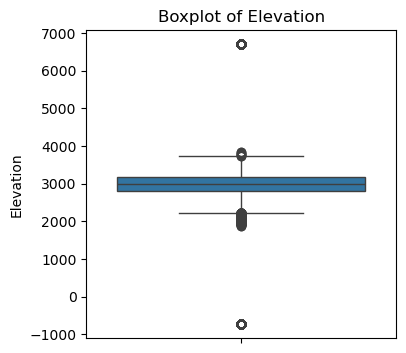

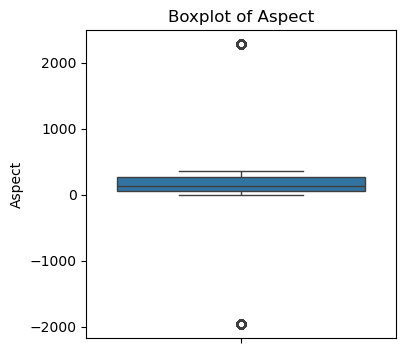

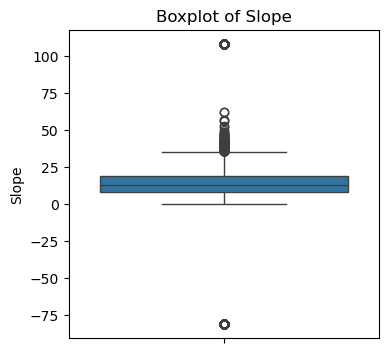

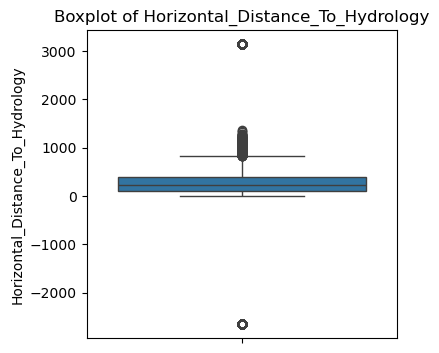

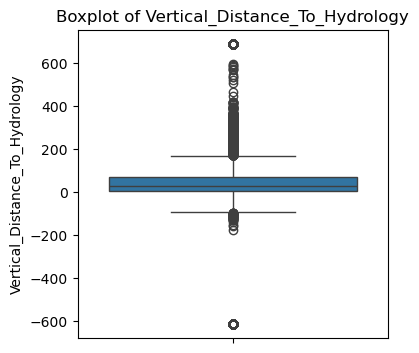

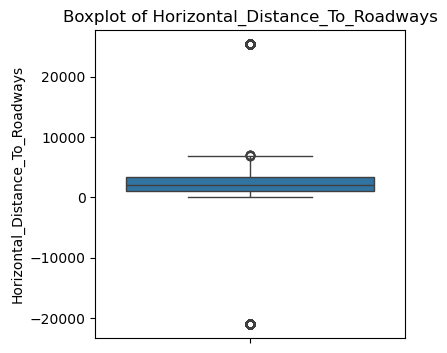

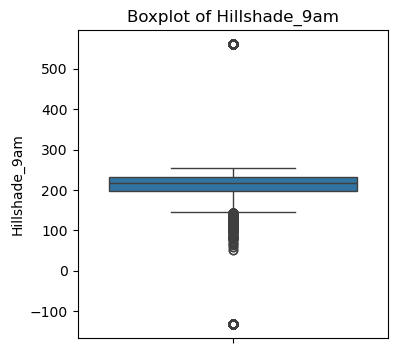

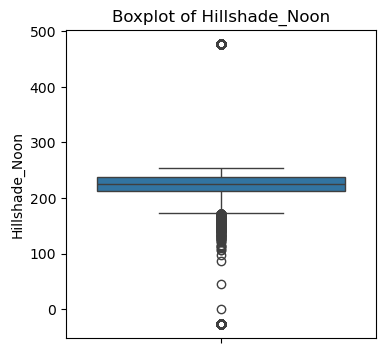

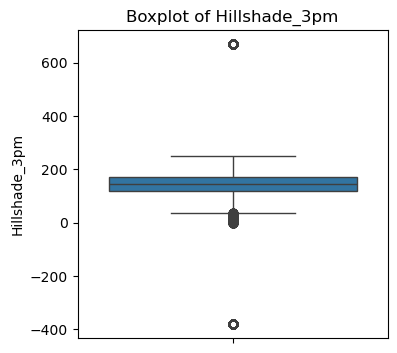

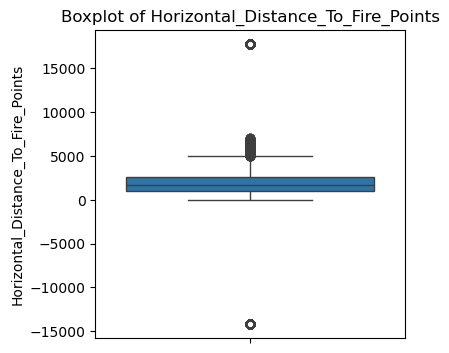

In [71]:
#Use boxplot to identify outliers based on wilderness areas
for i in [Elevation, Aspect, Slope, HD_toH, VD_toH, HD_toR, HS_9am, HS_Noon, HS_3pm, HD_toFP]:
    plt.figure(figsize = (4, 4))
    sns.boxplot(data = df, y = i)

    plt.title(f'Boxplot of {i}')
    plt.ylabel(i)
    
    plt.show()

In [72]:
#Drop the columns that is irrelevant Unnamed: 0 column first
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Forest_Cover,Neota,Rawah,Comanche Peak,Cache la Poudre
0,3351.0,NaN,27.0,726.0,124.0,3813.0,192.0,252.0,NaN,2271.0,...,NaN,NaN,NaN,NaN,0.0,Spruce/Fir,0,1,0,0
1,2732.0,129.0,7.0,212.0,1.0,1082.0,231.0,236.0,137.0,912.0,...,NaN,NaN,NaN,0.0,0.0,Lodgepole Pine,0,0,1,0
2,2572.0,24.0,9.0,201.0,689.0,957.0,216.0,222.0,NaN,2191.0,...,0.0,NaN,0.0,0.0,0.0,Lodgepole Pine,0,0,1,0
3,2824.0,69.0,13.0,417.0,39.0,3223.0,NaN,214.0,NaN,6478.0,...,0.0,0.0,NaN,0.0,0.0,Lodgepole Pine,0,1,0,0
4,2529.0,84.0,5.0,120.0,9.0,1092.0,NaN,231.0,139.0,4983.0,...,0.0,0.0,NaN,0.0,0.0,Lodgepole Pine,0,1,0,0


### (1) Categorical variables preprocessing

Forest_Cover column preprocessing

In [75]:
#Convert categorical variable Forest_Covert into category dtype
df["Forest_Cover"] = df["Forest_Cover"].astype("category")

4 wilderness areas columns (Neota, Rawah, Comanche Peak, Cache la Poudre) preprocessing

In [77]:
#First check whether all sample belongs to exact one wilderness
wilderness_counts = df[Wilderness_cols].sum(axis=1)
if (wilderness_counts == 1).all():
    print("Each sample belongs to exactly one of the four wilderness areas")
else:
    print("Missing data detected.")

#Because each sample belongs to one of the four wildernesses, convert them into a single column
df["Wilderness_Area"] = df[Wilderness_cols].idxmax(axis = 1).astype("category")
#Drop the redundant columns
df.drop(columns = Wilderness_cols, inplace = True)

#Check the consistency in the Wilderness_Area column
print(df["Wilderness_Area"].value_counts())

Each sample belongs to exactly one of the four wilderness areas
***************************************************************************
Wilderness_Area
Rawah              13775
Comanche Peak      13584
Cache la Poudre     1916
Neota               1585
Name: count, dtype: int64
***************************************************************************


40 binary Soil_Type columns (Soil_Type1 - Soil_Type40) preprocessing

In [79]:
#Covert the 40 Soil_Type columns into one single column.
#Fill in the NaN values with 0
df[Soil_Type_cols] = df[Soil_Type_cols].fillna(0)

#
df["Soil_Type"] = df[Soil_Type_cols].idxmax(axis=1)
df["Soil_Type"] = df.apply(lambda row: "Unknown" if row[Soil_Type_cols].sum() == 0 else row["Soil_Type"], axis=1)

#Drop the redundant columns
df.drop(columns = Soil_Type_cols, inplace = True)

#Covert Soil_Type variable into category dtype
df["Soil_Type"] = df["Soil_Type"].astype("category")

#Check the consistency in the Wilderness_Area column
print(df["Soil_Type"].value_counts())
print("***"*25)

#Calculate the UNKNOWN Soil Type percentage
unknown_percent = (df["Soil_Type"] == "Unknown").mean() * 100
print(f"Percentage of UNKNOWN Soil Type samples: {unknown_percent:.2f}%")

Soil_Type
Unknown        12811
Soil_Type29     2515
Soil_Type23     1950
Soil_Type10     1703
Soil_Type32     1630
Soil_Type33     1207
Soil_Type22     1144
Soil_Type12      780
Soil_Type30      739
Soil_Type13      726
Soil_Type11      686
Soil_Type31      579
Soil_Type24      565
Soil_Type39      552
Soil_Type4       491
Soil_Type38      425
Soil_Type2       358
Soil_Type40      286
Soil_Type6       256
Soil_Type3       218
Soil_Type20      194
Soil_Type16      140
Soil_Type1       132
Soil_Type19      112
Soil_Type17      110
Soil_Type18       77
Soil_Type5        74
Soil_Type34       64
Soil_Type26       63
Soil_Type9        62
Soil_Type35       47
Soil_Type28       47
Soil_Type27       29
Soil_Type14       26
Soil_Type21       23
Soil_Type25       12
Soil_Type8        11
Soil_Type7         8
Soil_Type37        7
Soil_Type36        1
Name: count, dtype: int64
***************************************************************************
Percentage of UNKNOWN Soil Type samples: 41.51%


In [80]:
#Check the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Elevation                           25923 non-null  float64 
 1   Aspect                              23763 non-null  float64 
 2   Slope                               28083 non-null  float64 
 3   Horizontal_Distance_To_Hydrology    28392 non-null  float64 
 4   Vertical_Distance_To_Hydrology      29009 non-null  float64 
 5   Horizontal_Distance_To_Roadways     28392 non-null  float64 
 6   Hillshade_9am                       21602 non-null  float64 
 7   Hillshade_Noon                      27157 non-null  float64 
 8   Hillshade_3pm                       22220 non-null  float64 
 9   Horizontal_Distance_To_Fire_Points  24997 non-null  float64 
 10  Forest_Cover                        30860 non-null  category
 11  Wilderness_Area             

### (2) Quantitative variables preprocessing

Missing Value Handling

In [83]:
#Handle quantitative variables's missing values with median value based on the their corresponding wilderness areas.
num_attr = [Elevation, Aspect, Slope, HD_toH, VD_toH, HD_toR, HS_9am, HS_Noon, HS_3pm, HD_toFP]

#Fill in the null value with wilderness-area-based median
for i in num_attr:
    df[i] = df.groupby("Wilderness_Area", observed = False)[i].transform(lambda x: x.fillna(x.median()))

print(df.isnull().sum())
df.head()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Forest_Cover                          0
Wilderness_Area                       0
Soil_Type                             0
dtype: int64


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Forest_Cover,Wilderness_Area,Soil_Type
0,3351.0,103.0,27.0,726.0,124.0,3813.0,192.0,252.0,138.0,2271.0,Spruce/Fir,Rawah,Unknown
1,2732.0,129.0,7.0,212.0,1.0,1082.0,231.0,236.0,137.0,912.0,Lodgepole Pine,Comanche Peak,Unknown
2,2572.0,24.0,9.0,201.0,689.0,957.0,216.0,222.0,147.0,2191.0,Lodgepole Pine,Comanche Peak,Soil_Type11
3,2824.0,69.0,13.0,417.0,39.0,3223.0,223.0,214.0,138.0,6478.0,Lodgepole Pine,Rawah,Soil_Type12
4,2529.0,84.0,5.0,120.0,9.0,1092.0,223.0,231.0,139.0,4983.0,Lodgepole Pine,Rawah,Soil_Type18


Outlier Handling

In [85]:
#Remove the definite outliers that beyond the outer fence to prevent bias caused by extreme values
def remove_outlier(data, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_outer_fence = Q1 - 3 * IQR
    upper_outer_fence = Q3 + 3 * IQR

    after_selection = df[(df[col] >= lower_outer_fence) & (df[col] <= upper_outer_fence)]
    return after_selection

#Use a for loop to implement the defined function on each numerical column
for i in [Elevation, Aspect, Slope, HD_toH, VD_toH, HD_toR, HS_9am, HS_Noon, HS_3pm, HD_toFP]:
    df = remove_outlier(df, i)

print(df.shape)

(19152, 13)


In [86]:
#Check the statistics after outlier removal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,19152.0,2967.063831,256.151765,1909.0,2854.75,3000.0,3137.25,3821.0
Aspect,19152.0,149.572107,98.805676,0.0,75.00,132.0,204.00,360.0
Slope,19152.0,13.553989,6.619996,0.0,9.00,13.0,17.00,44.0
Horizontal_Distance_To_Hydrology,19152.0,262.887845,197.268025,0.0,120.00,218.0,361.00,1177.0
Vertical_Distance_To_Hydrology,19152.0,42.396147,49.901434,-155.0,8.00,29.0,62.00,251.0
Horizontal_Distance_To_Roadways,19152.0,2342.571951,1508.777915,0.0,1154.00,1983.0,3162.00,7078.0
Hillshade_9am,19152.0,214.844455,19.682933,142.0,208.00,216.0,225.00,254.0
Hillshade_Noon,19152.0,224.368160,17.244253,149.0,215.00,226.0,236.00,254.0
Hillshade_3pm,19152.0,142.944940,30.130799,41.0,130.00,144.0,156.00,244.0
Horizontal_Distance_To_Fire_Points,19152.0,1919.518875,1114.530985,0.0,1172.00,1736.0,2311.00,6121.0


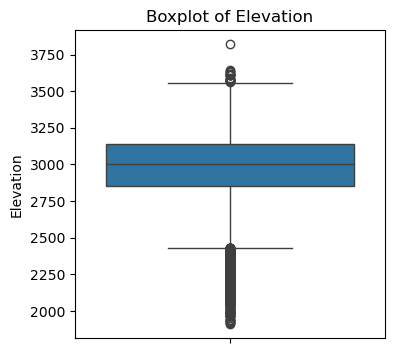

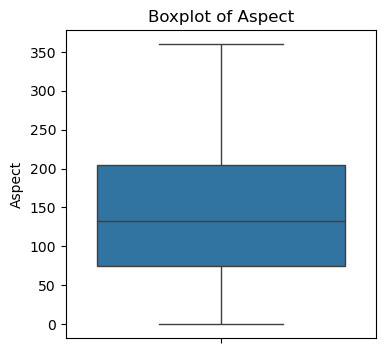

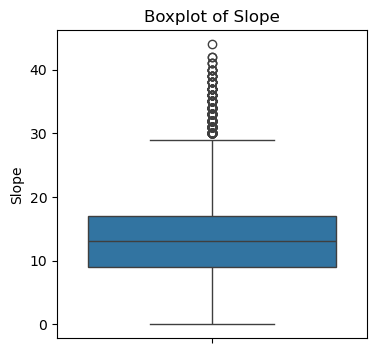

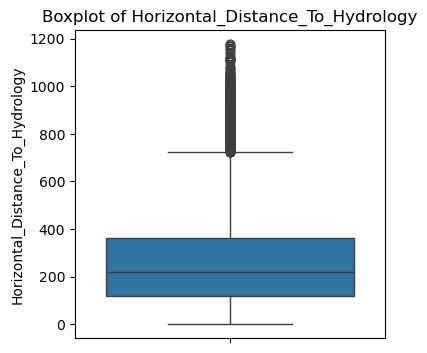

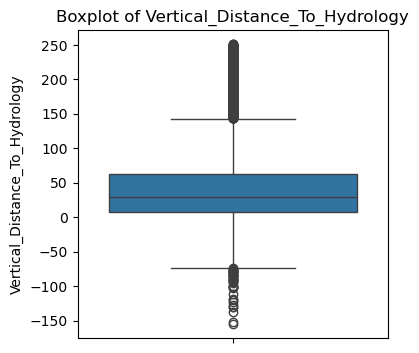

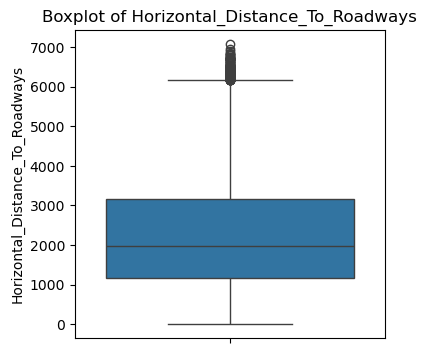

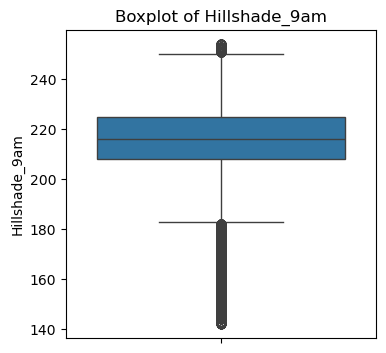

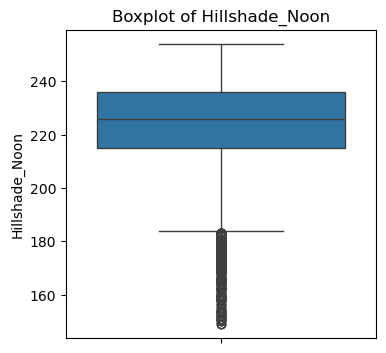

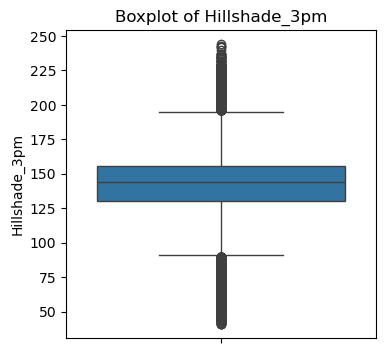

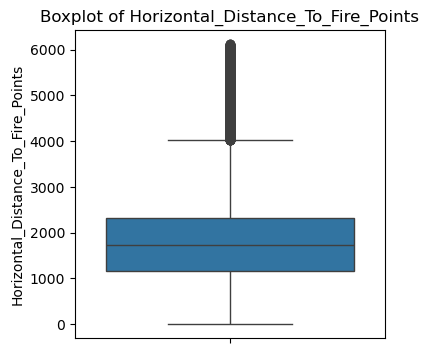

In [87]:
#Check the box plot after outlier removal
for i in [Elevation, Aspect, Slope, HD_toH, VD_toH, HD_toR, HS_9am, HS_Noon, HS_3pm, HD_toFP]:
    plt.figure(figsize = (4, 4))
    sns.boxplot(data = df, y = i)

    plt.title(f'Boxplot of {i}')
    plt.ylabel(i)
    
    plt.show()

## 3. Exploratory Data Analysis

### (1) Univariate Analysis

Categorical variables

Forest_Cover
Lodgepole Pine       9328
Spruce/Fir           7188
Ponderosa Pine       1074
Krummholz             607
Douglas-fir           566
Aspen                 295
Cottonwood/Willow      94
Name: count, dtype: int64
******************************************************************************************


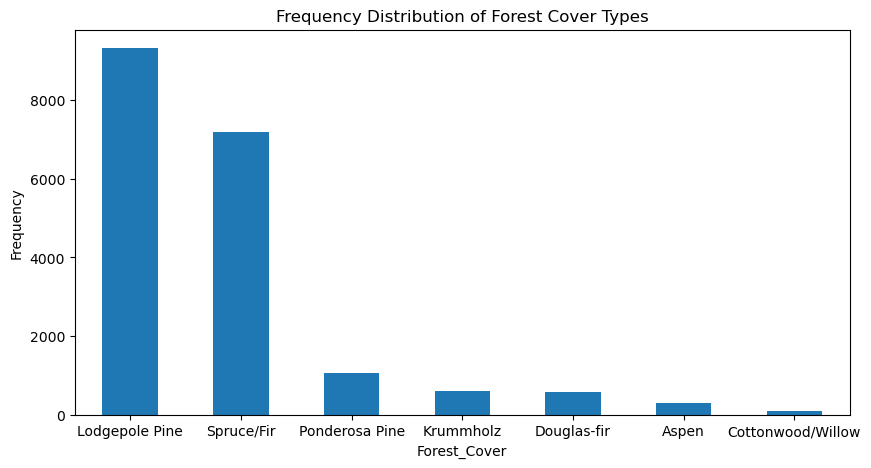

In [91]:
#Frequency distribution of target variable - Forest_Cover
forest_freq = df["Forest_Cover"].value_counts()
print(forest_freq)

#Frequency bar chart of Forest_Cover
plt.figure(figsize = (10, 5))
ax = forest_freq.plot.bar(title = "Frequency Distribution of Forest Cover Types")
ax.set_xlabel("Forest_Cover")
ax.set_ylabel("Frequency")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
plt.show()

Numerical variables

In [93]:
#Check the statistics of each numerical variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,19152.0,2967.063831,256.151765,1909.0,2854.75,3000.0,3137.25,3821.0
Aspect,19152.0,149.572107,98.805676,0.0,75.00,132.0,204.00,360.0
Slope,19152.0,13.553989,6.619996,0.0,9.00,13.0,17.00,44.0
Horizontal_Distance_To_Hydrology,19152.0,262.887845,197.268025,0.0,120.00,218.0,361.00,1177.0
Vertical_Distance_To_Hydrology,19152.0,42.396147,49.901434,-155.0,8.00,29.0,62.00,251.0
Horizontal_Distance_To_Roadways,19152.0,2342.571951,1508.777915,0.0,1154.00,1983.0,3162.00,7078.0
Hillshade_9am,19152.0,214.844455,19.682933,142.0,208.00,216.0,225.00,254.0
Hillshade_Noon,19152.0,224.368160,17.244253,149.0,215.00,226.0,236.00,254.0
Hillshade_3pm,19152.0,142.944940,30.130799,41.0,130.00,144.0,156.00,244.0
Horizontal_Distance_To_Fire_Points,19152.0,1919.518875,1114.530985,0.0,1172.00,1736.0,2311.00,6121.0


Skewness of Elevation: -0.93
Kurtosis of Elevation: 1.16


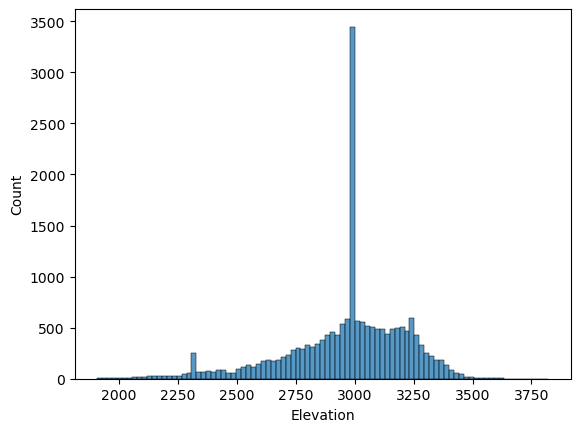

Skewness of Aspect: 0.59
Kurtosis of Aspect: -0.65


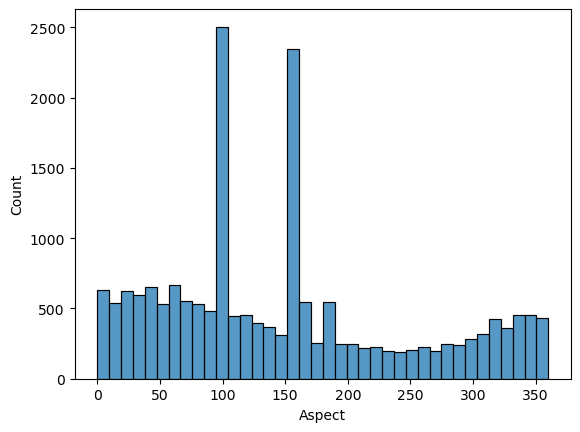

Skewness of Slope: 0.68
Kurtosis of Slope: 0.40


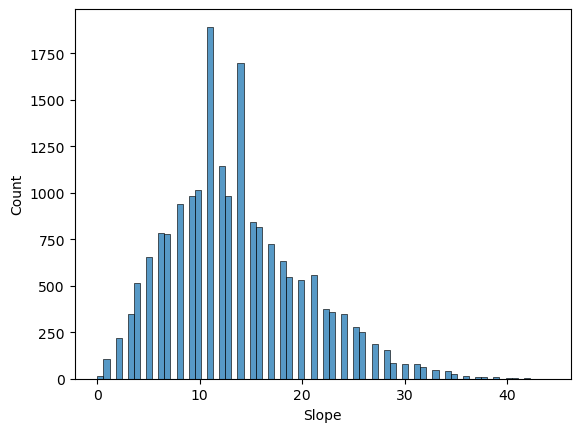

Skewness of Horizontal_Distance_To_Hydrology: 1.14
Kurtosis of Horizontal_Distance_To_Hydrology: 1.35


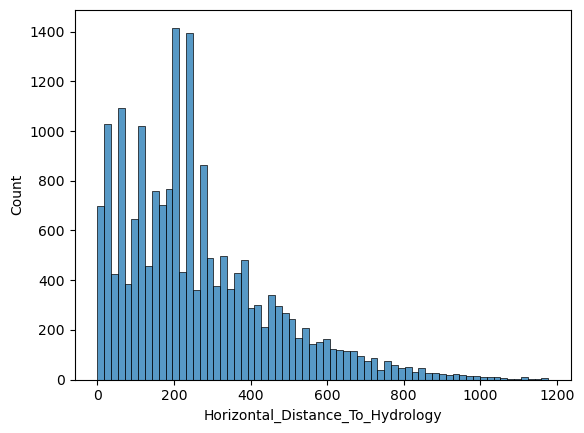

Skewness of Vertical_Distance_To_Hydrology: 1.37
Kurtosis of Vertical_Distance_To_Hydrology: 2.24


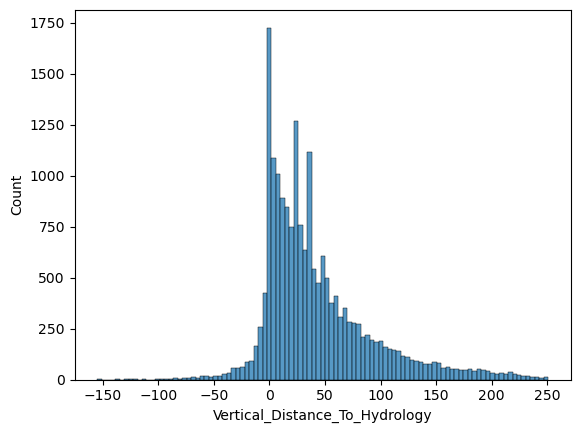

Skewness of Horizontal_Distance_To_Roadways: 0.74
Kurtosis of Horizontal_Distance_To_Roadways: -0.22


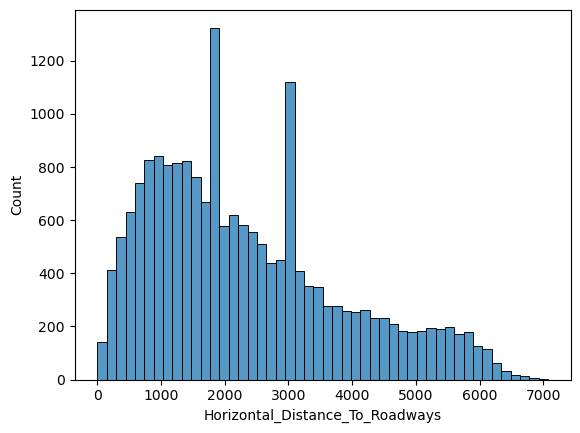

Skewness of Hillshade_9am: -0.95
Kurtosis of Hillshade_9am: 1.35


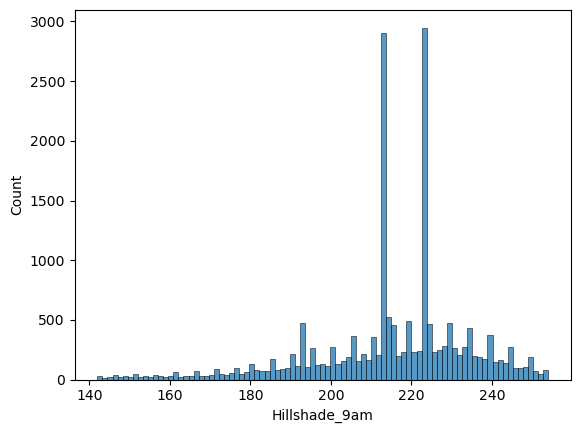

Skewness of Hillshade_Noon: -0.84
Kurtosis of Hillshade_Noon: 1.16


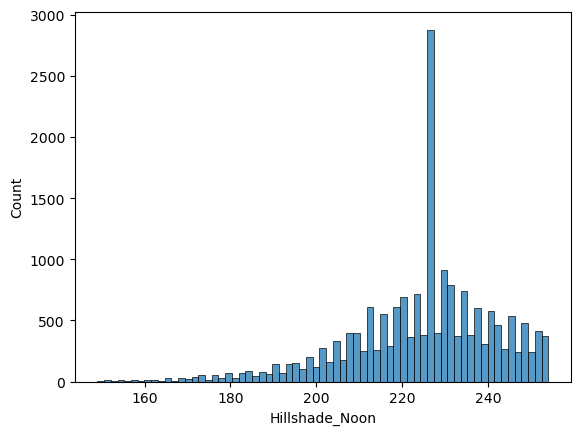

Skewness of Hillshade_3pm: -0.16
Kurtosis of Hillshade_3pm: 0.85


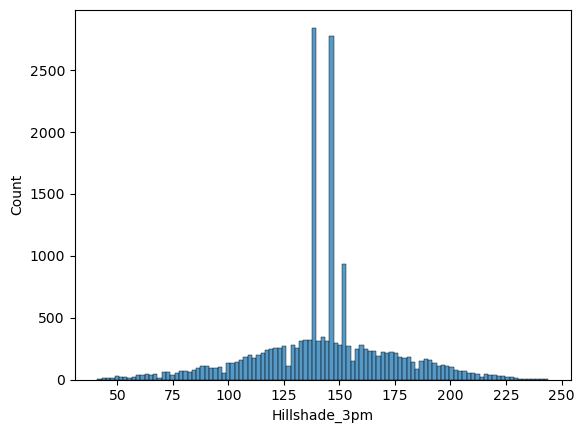

Skewness of Horizontal_Distance_To_Fire_Points: 1.25
Kurtosis of Horizontal_Distance_To_Fire_Points: 1.99


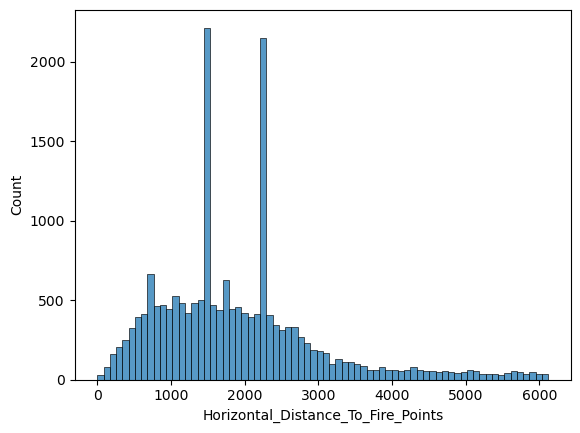

In [94]:
#Histograms to understand numerical variables distribution
for i in df[[Elevation, Aspect, Slope, HD_toH, VD_toH, HD_toR, HS_9am, HS_Noon, HS_3pm, HD_toFP]]:
    print(f"Skewness of {i}: {df[i].skew():.2f}")
    print(f"Kurtosis of {i}: {df[i].kurt():.2f}")
    sns.histplot(data = df, x = i)
    plt.show()

### (2) Bivariate and Multivariate Analysis

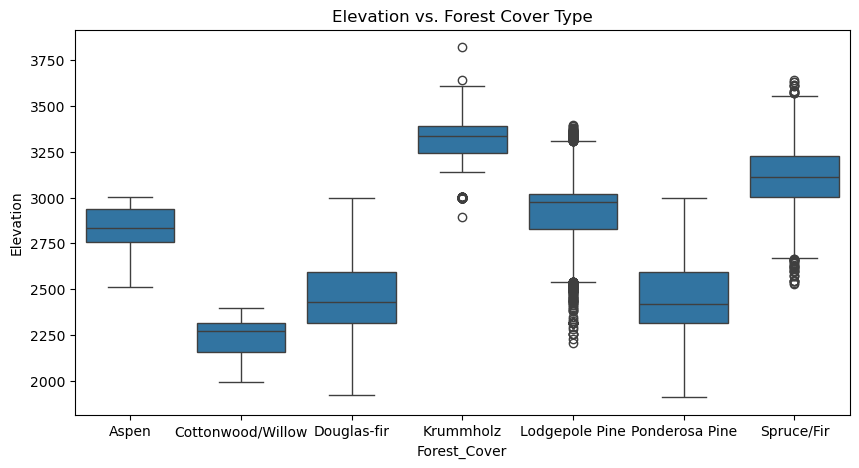

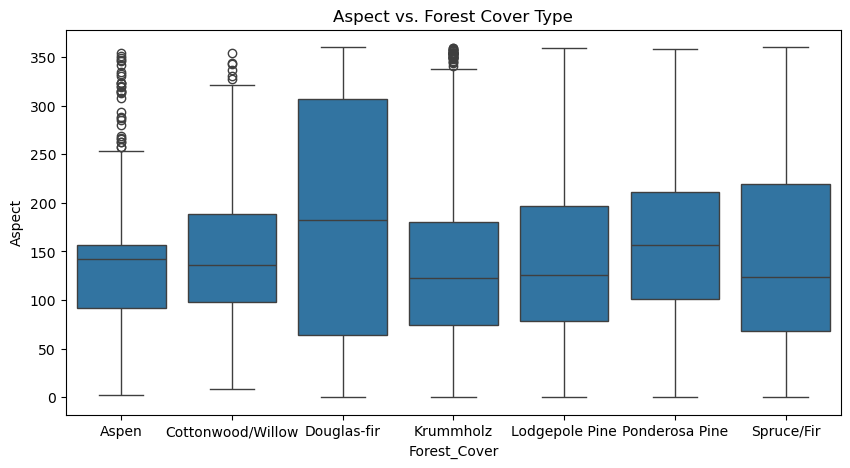

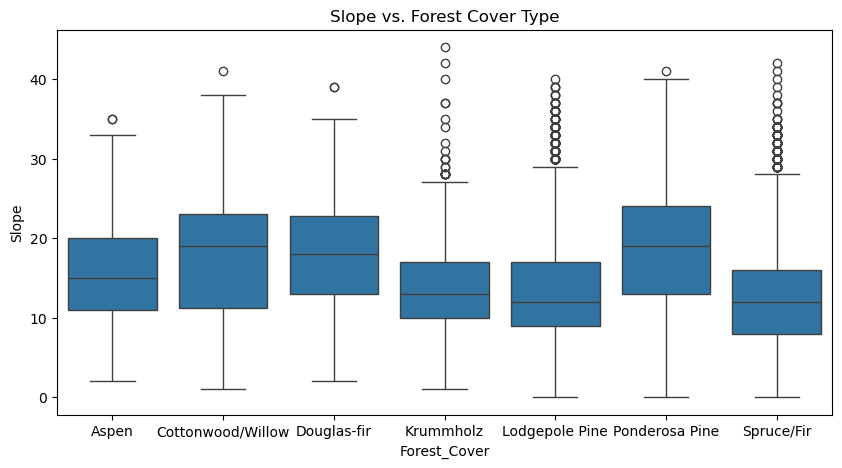

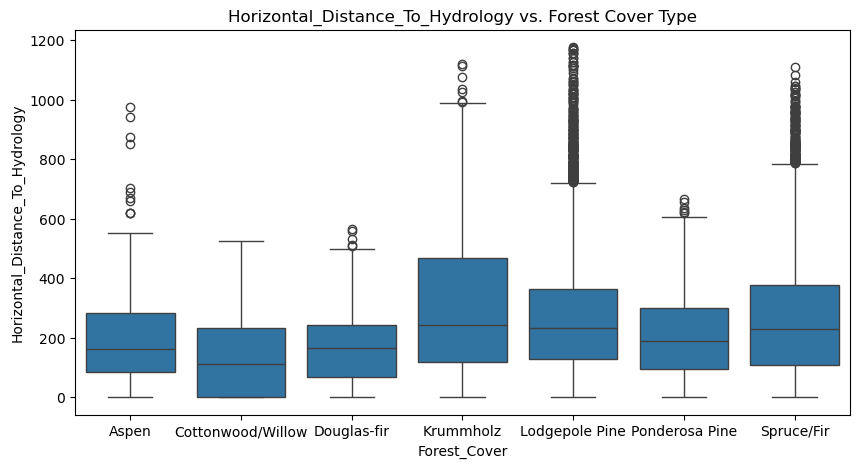

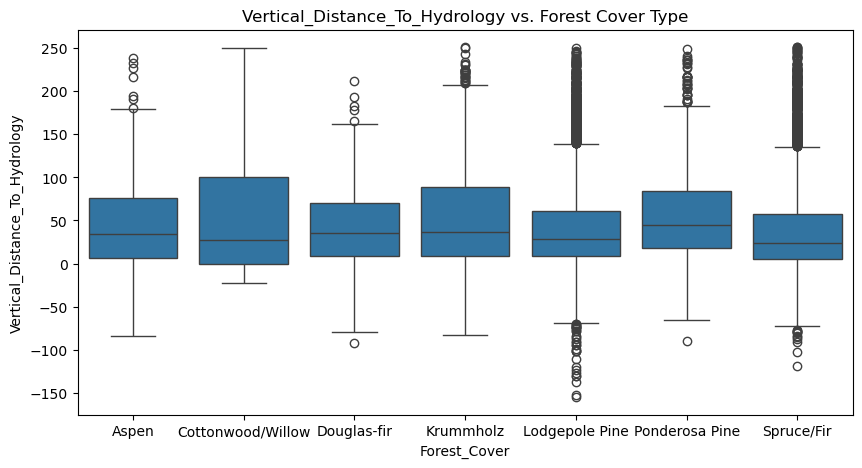

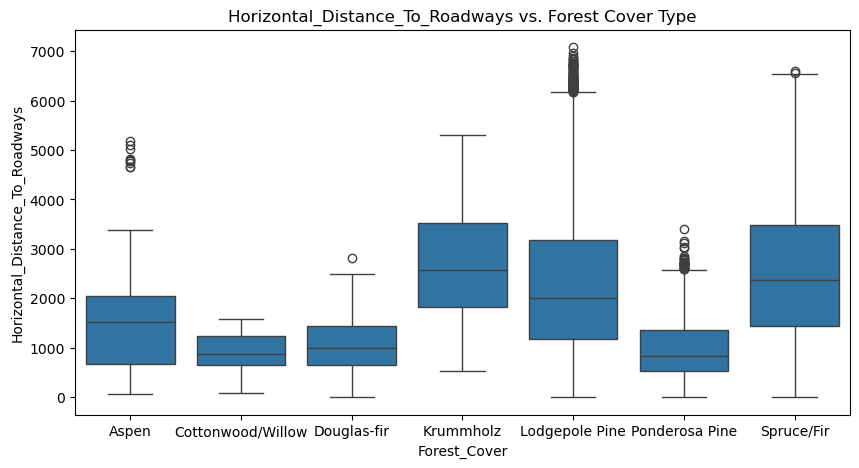

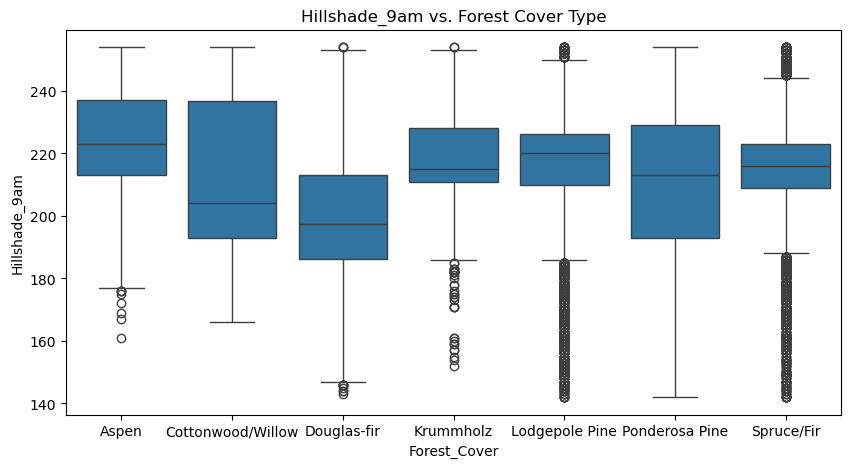

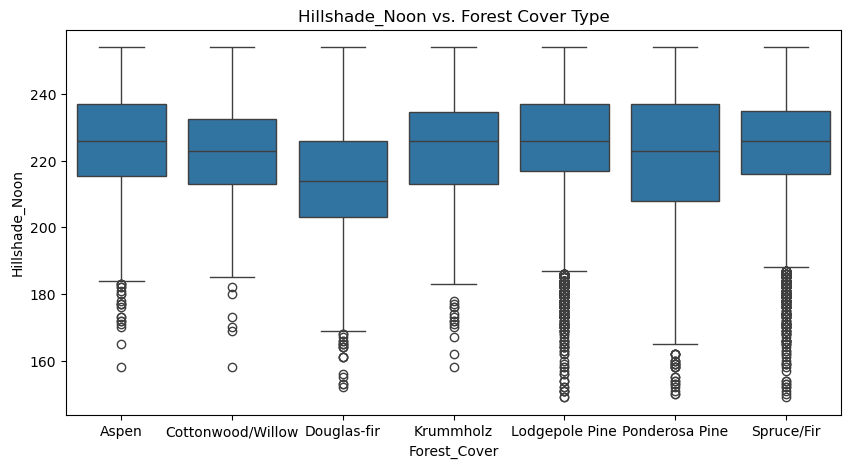

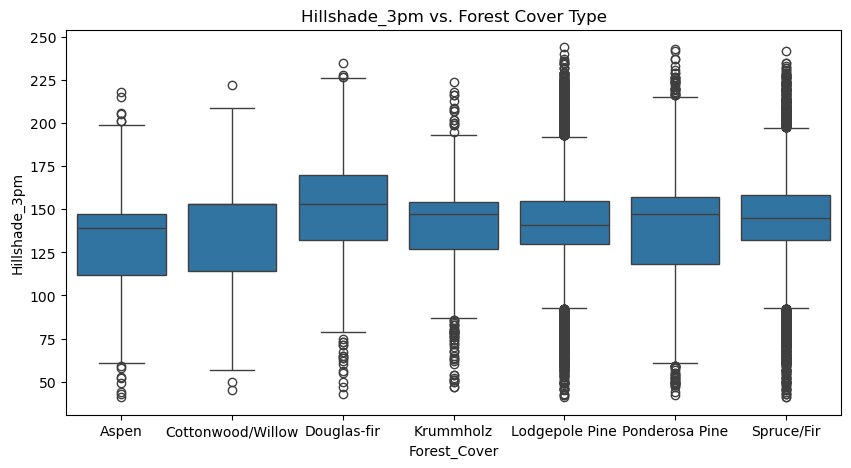

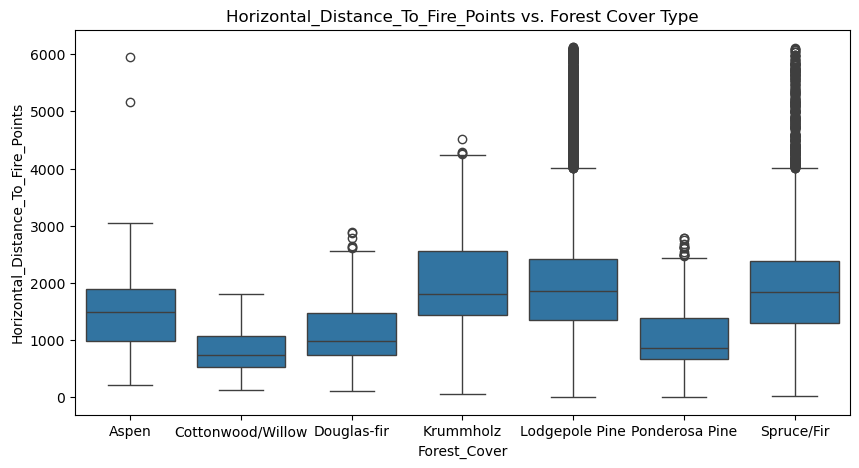

In [96]:
#Check the boxplot of numercial variables by Forest_Cover
for i in df[[Elevation, Aspect, Slope, HD_toH, VD_toH, HD_toR, HS_9am, HS_Noon, HS_3pm, HD_toFP]]:
    plt.figure(figsize = (10, 5))
    sns.boxplot(data = df, x = "Forest_Cover", y = i)
    plt.title(f"{i} vs. Forest Cover Type")
    plt.show()

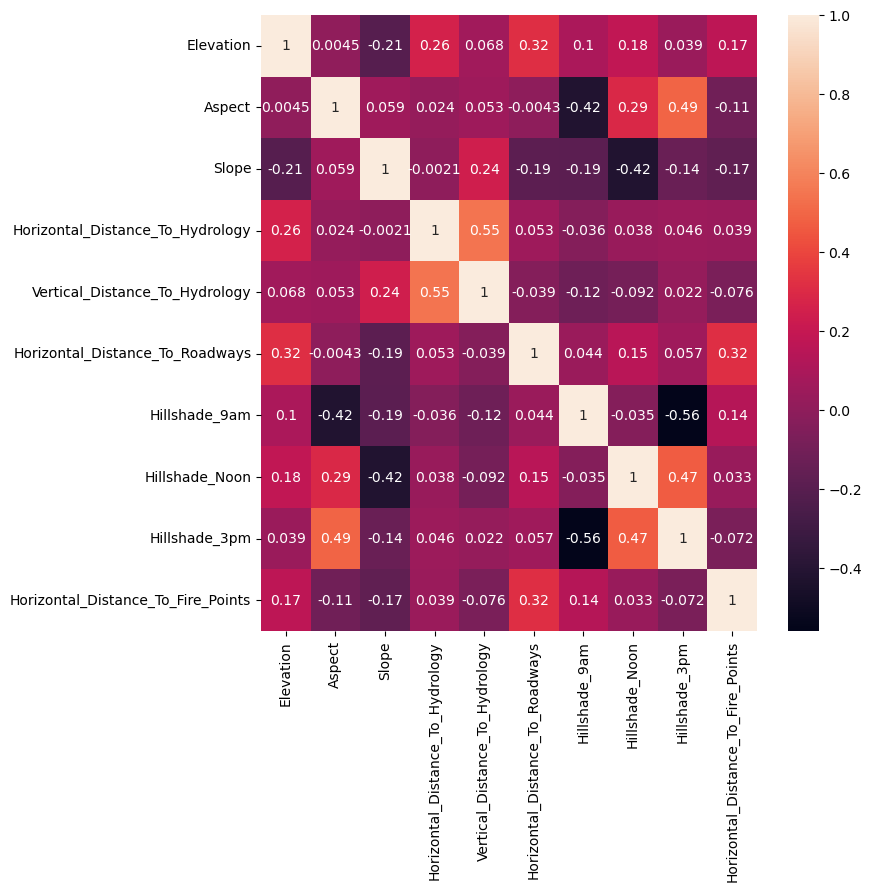

In [97]:
#Check the correlations between quantitative variables
s = df[[Elevation, Aspect, Slope, HD_toH, VD_toH, HD_toR, HS_9am, HS_Noon, HS_3pm, HD_toFP]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(s, annot=True)
plt.show()

In [98]:
#Output the cleaned csv file
#df.to_csv("CleanDataset.csv", index=False)